In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/corona_tested_individuals_ver_0083.english.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


In [ ]:
df.dropna(inplace = True)
df['test_date']=pd.DatetimeIndex(df['test_date'])
df = df.set_index('test_date')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


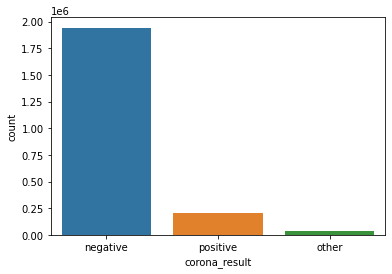

In [ ]:
sns.countplot(df['corona_result'])


In [ ]:
co = df.copy(True)
co['gender'] = co['gender'].map({'female': 0, 'male': 1})
# co['test_indication'] = co['test_indication'].map({'Other': 0, 'Contact with confirmed': 1 ,'Abroad':2 })
co = co.loc[co.test_indication == 'Contact with confirmed']
co = co[co.age_60_and_above != 'NaN']
co['age_60_and_above'] = co['age_60_and_above'].map({'Yes': 1,'No':0 })
co = co[co.corona_result != 'other']
co['corona_result'] = co['corona_result'].map({'positive': 1, 'negative' : 0  })





In [ ]:
co.corona_result.unique()

array([0, 1])

In [ ]:
co

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
test_date,,,,,,,,,
2020-11-12,0,1,0,0,0,0,0,1,Contact with confirmed
2020-11-12,0,0,0,0,0,0,0,0,Contact with confirmed
2020-11-12,1,0,0,0,0,0,0,1,Contact with confirmed
2020-11-12,0,0,0,0,0,0,1,1,Contact with confirmed
2020-11-12,0,0,0,0,0,0,0,0,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
2020-03-20,1,0,1,0,1,0,0,0,Contact with confirmed
2020-03-20,1,0,0,1,1,1,0,1,Contact with confirmed
2020-03-20,1,0,0,0,0,0,0,0,Contact with confirmed


In [ ]:
del co['test_indication']


In [ ]:
co.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,147809.000000,147809.000000,147809.000000,147809.000000,147809.000000,147809.000000,147809.000000,147809.000000
mean,0.217179,0.225967,0.099750,0.029829,0.203540,0.627289,0.088939,0.486594
std,0.412327,0.418219,0.299668,0.170116,0.402632,0.483528,0.284657,0.499822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
co

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
test_date,,,,,,,,
2020-11-12,0,1,0,0,0,0,0,1
2020-11-12,0,0,0,0,0,0,0,0
2020-11-12,1,0,0,0,0,0,0,1
2020-11-12,0,0,0,0,0,0,1,1
2020-11-12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2020-03-20,1,0,1,0,1,0,0,0
2020-03-20,1,0,0,1,1,1,0,1
2020-03-20,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances




In [ ]:
jac_co = co.to_numpy()


In [ ]:
jc= pairwise_distances(jac_co, metric = "jaccard")
print(jc)
jh =pairwise_distances(jac_co, metric = "hamming")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [ ]:
djc = pd.DataFrame(jc, index=co.T.columns, columns=co.T.columns)
djh = pd.DataFrame(jh, index=co.T.columns, columns=co.T.columns)

In [ ]:
djc

In [ ]:
djh

In [ ]:
ax = sns.heatmap(co, vmin=0, vmax=1)


In [ ]:
y  = co.corona_result.values
X = co.loc[:, co.columns != 'corona_result'].values


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
ac1 = accuracy_score(y_pred,y_test)  
ac1

In [ ]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
error

In [ ]:
plt.figure(figsize=(3, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=co.loc[:, co.columns != 'corona_result'].columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
y_pred = dt.predict(X_test)


In [ ]:
ac2 = accuracy_score(y_pred,y_test)  
ac2